<a href="https://colab.research.google.com/github/Check-Your-Skin/checkyourskin-ml_model/blob/dp-HAM10000/Data%20Preparation/HAM10000_DP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import**

In [1]:
import os
import io
import shutil
import zipfile

from glob import glob
from PIL import Image
from google.colab.patches import cv2_imshow
from concurrent.futures import ThreadPoolExecutor
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/HAM10000/')

Remove duplicate Images

In [4]:
shutil.rmtree('/content/HAM10000/ham10000_images_part_1')
shutil.rmtree('/content/HAM10000/ham10000_images_part_2')

#**Data Preparation**

###Check Image Size

In [5]:
width = 600
height = 450
wrong_size = 0
data = glob('/content/HAM10000/*')
for dir in data:
  if os.path.isdir(dir):
    images = glob(f'{dir}/*')
    for image in images:
      img = Image.open(image)
      w, h = img.size
      if (w != width or h != height):
        wrong_size =+ 1
        print(f'Path: {image}\nHeight: {h}\nWidth: {w}')
print(wrong_size)

0


###Compare Libraries

In [6]:
class compare:
  dest_dir = '/content/compare/'
  def __init__(self, img_path):
    self.img_path = img_path
    try:
      os.mkdir(self.dest_dir)
    except:
      pass
    self.copy_original()
    self.pil_resize()
    self.cv2_resize()

  def copy_original(self):
    shutil.copy(self.img_path, self.dest_dir)

  def pil_resize(self):
    img = Image.open(self.img_path)
    width, height = img.size
    new_height = 400
    new_width  = int(new_height * width / height)

    img = img.resize((new_width, new_height), Image.Resampling.LANCZOS)
    img.save(self.dest_dir + 'pil_resize.jpg')

  def cv2_resize(self):
    img = cv2.imread(self.img_path)
    new_height = 400
    new_width  = int(new_height * width / height)
    img = cv2.resize(img, (new_width, new_height))
    cv2.imwrite(self.dest_dir + 'cv2_resize.jpg',img)

  def show_img_details(self, img_path):
    img = pltimg.imread(img_path)
    imgplot = plt.imshow(img)

    img = Image.open(img_path)
    width, height = img.size
    filename = os.path.basename(img_path)

    plt.figtext(0.2,-0.05,f'{filename}\nHeight: {height}\nWidth: {width}')
    plt.show()

  def render_plots(self):
    res = glob('/content/compare/*')
    for img in res:
      self.show_img_details(img)

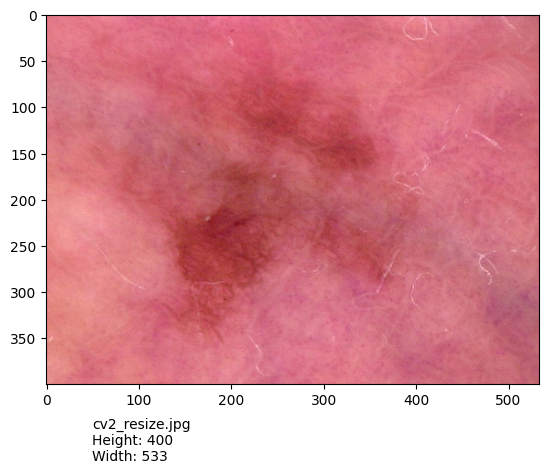

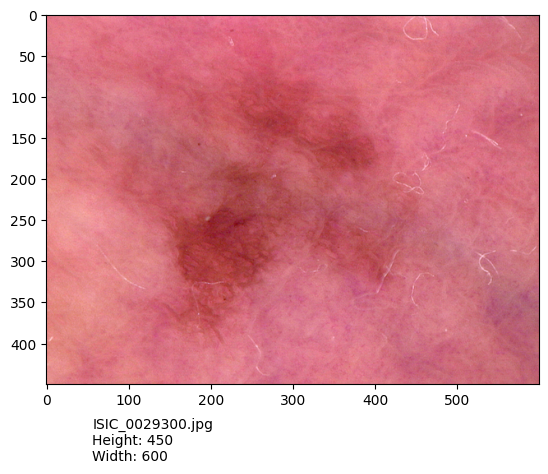

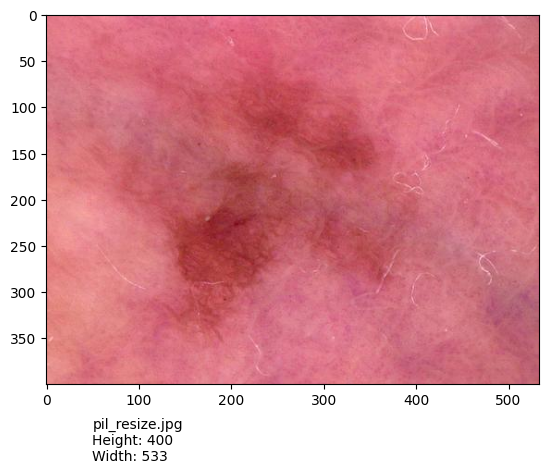

In [7]:
test_image = '/content/HAM10000/HAM10000_images_part_1/ISIC_0029300.jpg'
comparison = compare(test_image)
comparison.render_plots()

In [8]:
def mse(img1, img2):
   h, w = img1.shape
   diff = cv2.subtract(img1, img2)
   err = np.sum(diff**2)
   mse = err/(float(h*w))
   return mse, diff

Image matching Error between the two images: <function mse at 0x79c123331c60>


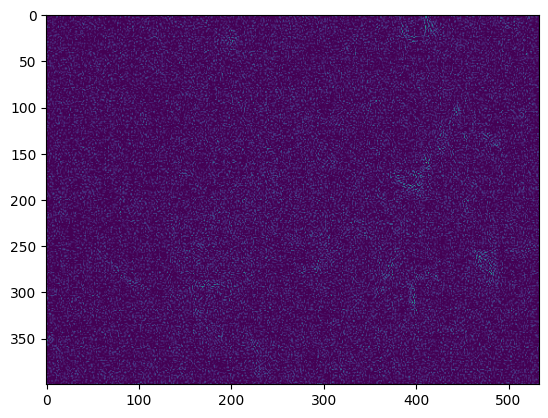

In [9]:
img1 = cv2.imread('/content/compare/cv2_resize.jpg')
img2 = cv2.imread('/content/compare/pil_resize.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
error, diff = mse(img1, img2)
print("Image matching Error between the two images:", mse)
plt.imshow(diff)
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

###Resize Images and Export to Drive

In [12]:
def resize_image(image):
  img = Image.open(image)
  width, height = img.size
  global new_height
  global new_width
  new_height = 250
  new_width  = int(new_height * width / height)
  img = img.resize((new_width, new_height), Image.Resampling.LANCZOS)
  img_name = os.path.basename(image)
  img.save(resize_dest_dir + img_name)

In [13]:
resize_dest_dir = '/content/HAM10000/HAM10000_images/'
try:
  os.mkdir(resize_dest_dir)
except:
  pass
data = glob('/content/HAM10000/*')
for dir in data:
  if os.path.isdir(dir):
    images = glob(f'{dir}/*')
    with ThreadPoolExecutor() as executor:
      executor.map(resize_image, images)

In [14]:
shutil.rmtree('/content/HAM10000/HAM10000_images_part_1')
shutil.rmtree('/content/HAM10000/HAM10000_images_part_2')

In [15]:
input_dir = '/content/HAM10000/'
output_file = f'HAM10000_resized_{new_width}x{new_height}'
shutil.make_archive(output_file, 'zip', input_dir)

'/content/HAM10000_resized_333x250.zip'

In [16]:
dest_dir = '/content/drive/My Drive/'
zip_file = f'{output_file}.zip'
shutil.copy(zip_file, dest_dir)

'/content/drive/My Drive/HAM10000_resized_333x250.zip'